### GEOPH-526 : Signal Processing in Geophysics.
##### Department of Physics,  University of Alberta, Fall 2021.


**Professor**: Mauricio D. Sacchi

**Student**: Joaquín Acedo

**email**: aacedo@ualberta.ca



In [1]:
#load packages
using DSP,FFTW, DelimitedFiles, LinearAlgebra, PyPlot


In [2]:
#define some plot parameters:

font_title=25;
font_label=20;
font_tick=12;
labelpad= 10.0;
size_label=15;
pad=15;
marker_size=10.0;
colors=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"];


## Assignment 4: 

#### 1. Read and use the "wavelet.txt" file. The sampling interval is given by $t = 0:004$ seconds.

Use the FFT to compute its amplitude spectrum and produce the following figures:

1.a Amplitude versus frequency in radians from $[0,\pi]$.

1.b Amplitude versus frequency in radians in $(-\pi,\pi]$.

1.c Amplitude versus frequency in Hertz in $[0,f_{Nyquist}]$.

In [3]:
function Padd1D(s, p :: Int64 = 10)
    input_type = eltype(s)
    sp=zeros(input_type,2^p)
    sp[1:length(s)] = s
    return sp
end

#xx=zeros(input_type,10)

Padd1D (generic function with 2 methods)

In [4]:
w=readdlm("wavelet.txt"); #read data
w=vec(w); #vectorize data N,1 >>>>> N
Nw=length(w) # data length
dt= 0.004; # sampling rate.
fs= 1/dt; # sampling frequency.
fn=fs/2; # Nyquist frequency

# Padding and frequency axis..

wp=Padd1D(w,10)
Np=length(wp)
Mp= Int((Np)/2) #
ω=zeros(Float64,Np); # frequency vector
dω=2π/(Np); # sampling rate in digital frequency
ω= dω*collect(0:1:Np-1);
#ω= -π .+ ω
#ω= [ -π + dω*(k-1)  for k=1:Np];
Ω= ω/dt; # rad/sec
f= Ω/2π; # Hz
Wk= fft(wp); # Fourier Transform of data.


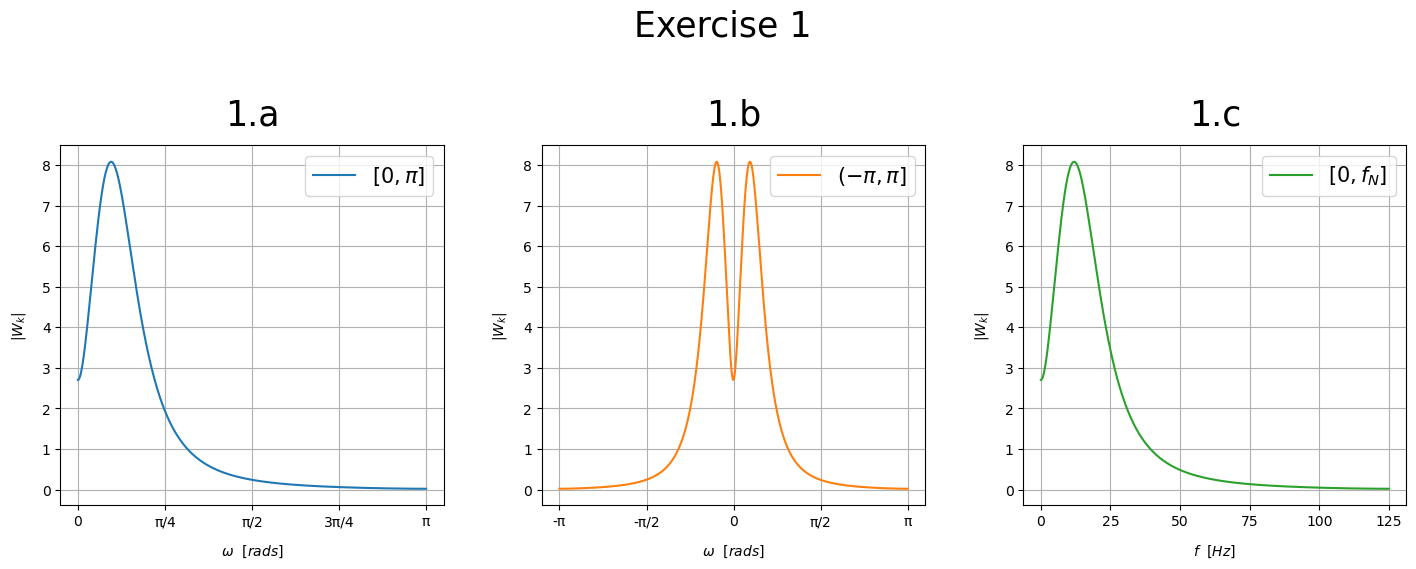

In [5]:
## Plots ##

fig, axs= plt.subplots(figsize=(15,5), nrows=1, ncols=3);
fig.tight_layout(pad=4.0)
fig.suptitle("Exercise 1", fontsize=font_title, y=1.15)
axs[1,1].set_title("1.a",fontsize=font_title, pad=pad)
axs[1,1].grid("True")
axs[1,1].plot(ω[1:Mp+1],abs.(Wk[1:Mp+1]), c=colors[1], label= L"[0,\pi]")
axs[1,1].set_xlabel(L"\omega~~[rads]",fontsize=font_label/2, labelpad=labelpad)
axs[1,1].set_ylabel(L"|W_{k}|",fontsize=font_label/2, labelpad=labelpad)
axs[1,1].set_xticks(collect(0:π/4:π))
axs[1,1].set_xticklabels(["0","π/4","π/2","3π/4","π"])
axs[1,1].legend(loc="upper right", fontsize=size_label);
#Plot2
axs[2,1].set_title("1.b",fontsize=font_title, pad=pad)
axs[2,1].grid("True")
axs[2,1].plot(-π .+ ω,abs.([Wk[Mp+2:Np];Wk[1:Mp+1]]),c=colors[2],label= L"(-\pi,\pi]")
axs[2,1].set_xlabel(L"\omega~~[rads]",fontsize=font_label/2, labelpad=labelpad)
axs[2,1].set_ylabel(L"|W_{k}|",fontsize=font_label/2, labelpad=labelpad)
axs[2,1].set_xticks(collect(-π:π/2:π))
axs[2,1].set_xticklabels(["-π","-π/2","0","π/2","π"])
axs[2,1].legend(loc="upper right", fontsize=size_label);

axs[3,1].set_title("1.c",fontsize=font_title, pad=pad)
axs[3,1].plot(f[1:Mp+1],abs.(Wk[1:Mp+1]), c=colors[3], label= L"[0,f_{N}]")
axs[3,1].set_xticks(collect(0:fn/5:fn))
axs[3,1].set_xticklabels(["0","25","50","75","100","125"])
axs[3,1].set_xlabel(L"f~~[Hz]",fontsize=font_label/2, labelpad=labelpad)
axs[3,1].set_ylabel(L"|W_{k}|",fontsize=font_label/2, labelpad=labelpad)
axs[3,1].legend(loc="upper right", fontsize=size_label);
axs[3,1].grid("True")



#### 2. Write your own DFT code and your own "easy" FFT algorithm and compare the result with those of fft provided. Do the separation between even and odd parts only once. That is, a series of length N is divided into two series of odd and even samples, and you need to use your DFT function of these two series to compute the DFT of the series of N points. Try your algorithm with a simple signal and compare the results with the regular fft and with your own DFT. Provide also the derivation of the FFT algorithm adequately explained following notes. Provides the codes for the DFT and your FFT.

The Fast Fourier Transform (FFT) is an algorithm that recursively splits the input array into two parts: one for the odd indices, and another for the even indices, until the trivial case is achieved. It is important to note that complex exponentials (that can be decomposed into a sum of sine and cosine) are periodic and symmetric, and from those properties the FFT is defined.

We define the Fourier kernel: $W = e^{-i \frac{2\pi}{N}}$ where $W$ is constant.


Let’s start assuming that we have series of length $2N$.

$$z_0, z_1, z_2, z_3,. . . ,z_{2N}$$

Using the definition, the Discrete Fourier Transform is:
$$Z_k=\sum_{x = 0}^{2N-1} z_n e^{-i \frac{2\pi n k}{2N}} , k= 0 : 2N -1$$

We rewrite the DFT in terms of two series composed of even samples and odd samples as:


$$Z_k=\sum_{x = 0}^{N-1} z_{2n} e^{-i \frac{2\pi 2n k}{2N}} + \sum_{x = 0}^{N-1} z_{2n+1} e^{-i \frac{2\pi (2n +1) k}{2N}} , k= 0 : 2N -1$$

The right side can be written as the DFTs of the even ($X_k$) and odd ($Y_k$) parts:


$$Z_k= X_k +(W^k)Y_k$$ with the Fourier Kernel $W = e^{-i \frac{2\pi}{N}}$


The last equation is the formula to compute the first $N$ samples of the DFT of $z$ based on the $N$ samples of the DFT of $x$ and $y$.


Using the definition again, but for $k= N : 2N -1$ and replacing $j= k-N$, we obtain:



$$Z_{j+N}=\sum_{x = 0}^{2N-1} z_n e^{-i \frac{2\pi n(j+N)}{2N}} , k= N : 2N -1$$


Again, we can rewrite this equation in terms of even ($X_j$) and odd ($Y_j$) parts of the series and obtain:

$$Z_j= X_j -(W^k)Y_j,  j= 0 : N -1$$  with the Fourier Kernel $W = e^{-i \frac{2\pi}{N}}$


The recursion allows to perform this trick until generating final time series of lenght 1. This implementation of the FFT assumes that the input has size $n = 2^p$, so we are going to have to use alternatives to overcome this issue when $n$ is not a power of two. This algorithm allows computing the Discrete Fourier Transform with complexity $O~(N \log N)$ instead of $O~(N^2)$.

In [6]:
N=4;
W= exp(-1im*2π/N) #Fourier Kernel
s=collect(0:100:300)
se=s[1:2:N]
so=s[2:2:N]


2-element Vector{Int64}:
 100
 300

In [7]:
# separate the even and the odd in two new even and odd arrays.
see=se[1:2:length(se)] #even_even
seo=se[2:2:length(se)] #even_odd


1-element Vector{Int64}:
 200

In [8]:
r_even0= see[1] +exp(-2im*pi*0/N)*seo[1]
r_even1=see[1] - exp(-2im*pi*0/N)*seo[1]
 
r_even= [r_even0 r_even1]




1×2 Matrix{ComplexF64}:
 200.0-0.0im  -200.0+0.0im

In [9]:
soe=so[1:2:length(so)]
soo=so[2:2:length(so)]

1-element Vector{Int64}:
 300

In [10]:
r_odd0= soe[1] +exp(-2im*pi*0/N)*soo[1]
r_odd1= soe[1] -exp(-2im*pi*0/N)*soo[1]

r_odd=[r_odd0 r_odd1]

1×2 Matrix{ComplexF64}:
 400.0-0.0im  -200.0+0.0im

In [11]:
r0=r_even[1] +exp(-2im*pi*0/N)*r_odd[1]
r2=r_even[1] -exp(-2im*pi*0/N)*r_odd[1] #conjugate

r1=r_even[2] +exp(-2im*pi*1/N)*r_odd[2]
r3=r_even[2] -exp(-2im*pi*1/N)*r_odd[2] #conj

r=[r0, r1, r2, r3]

4-element Vector{ComplexF64}:
  600.0 - 0.0im
 -200.0 + 200.0im
 -200.0 + 0.0im
 -200.0 - 200.0im

In [12]:
"""
Sk= myfft(s)

Compute the Discrete Time Fourier Transform (Frequency Response) of a signal `s` using the Fast Fourier Transform algorithm.
To work correctly the length of the signal needs to be 2^p.
"""
function myfft(s)
    
    N=length(s)
    if N <= 1
        return s
    end
    
    
    W=exp(-2im*π/N)
    #Recursion
    even_part=myfft(s[1:2:length(s)-1])
    odd_part=myfft(s[2:2:length(s)])
        
    X = zeros(ComplexF64,N)
      
    M= Int(N/2)
        
    for i in 1:M
            X[i]= even_part[i] + W^(i-1)*odd_part[i]
            X[M+i]=even_part[i] -W^(i-1)*odd_part[i]
    end
    
    out = X
    
    return out
end



myfft

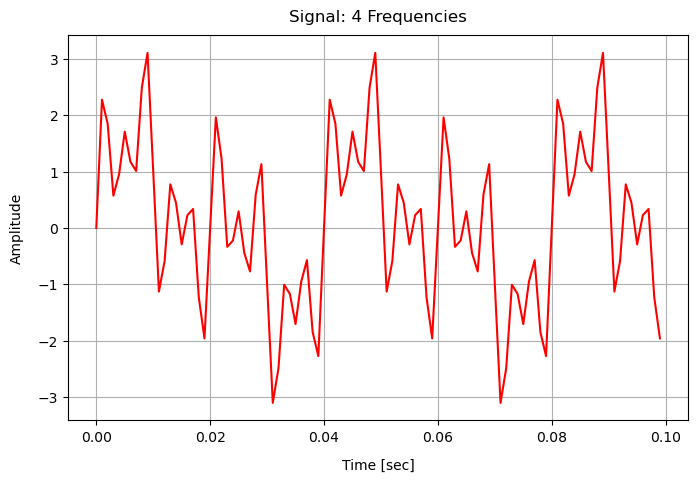

In [13]:
# Example
dt=0.001;
fs=1/dt
fn=fs/2;
Ns=2^15; # Power of 2.
Ms=Int(Ns/2)+1
t = dt*collect(0:1:Ns-1);
s = sin.(2π*25*t) .+  sin.(2π*50*t) .+ sin.(2π*150*t) .+ sin.(2π*250*t);
figure(1, figsize=(8,5));
plt.plot(t[1:100],s[1:100], c="red");
plt.grid("True");
plt.xlabel("Time [sec]", labelpad= 10.0);
plt.ylabel("Amplitude", labelpad=10.0);
plt.title("Signal: 4 Frequencies",pad=10.0);

In [14]:
"""
DtFT= DtFT (Nk,dt, xn )

Compute the Discrete Time Fourier Transform (Frequency Response) of a signal `xn` using a `dt` time sampling interval
and Nk samples.

Returns `DtFT` which is a `Vector{ComplexF64}` that carries the Discrete time Fourier Transform of the signal.
Returns the digital angular frequency ω, the angular frequency Ω and the frequency f in Hertz.

# Arguments
- ` Nk :: Int64`: the output numer of samples.
- `dt :: Float64`: sampling interval for the discrete signal.
- ` xn :: Vector{Float64}`: discrete time signal.


"""
function DtFT(N :: Int64, dt:: Float64, xn :: Vector{Float64})
    
    ω=zeros(Float64,N)
    ω= [ -π + 2.0*π*(k)/(N)  for k=0:N-1]
   # dω=2π/N;
   # ω= dω*collect(0:1:N-1)

    Ω= ω/dt;
    f= Ω/2π;
    
    DtFT=zeros(ComplexF64,length(ω))
    
    for k in 1:length(ω)-1;
        for n in 1:length(xn)-1
            DtFT[k]= DtFT[k] + xn[n]*exp(-1im*ω[k]*(n))
        end
    end
    
    return DtFT
end

DtFT

In [15]:
Sk_dft=DtFT(length(s),1.0,s)
Sk_fft=fft(s);
Sk_myfft=myfft(s);

dω=2π/Ns;
ω= dω*collect(0:1:Ns-1);
f=ω/(2π*dt);


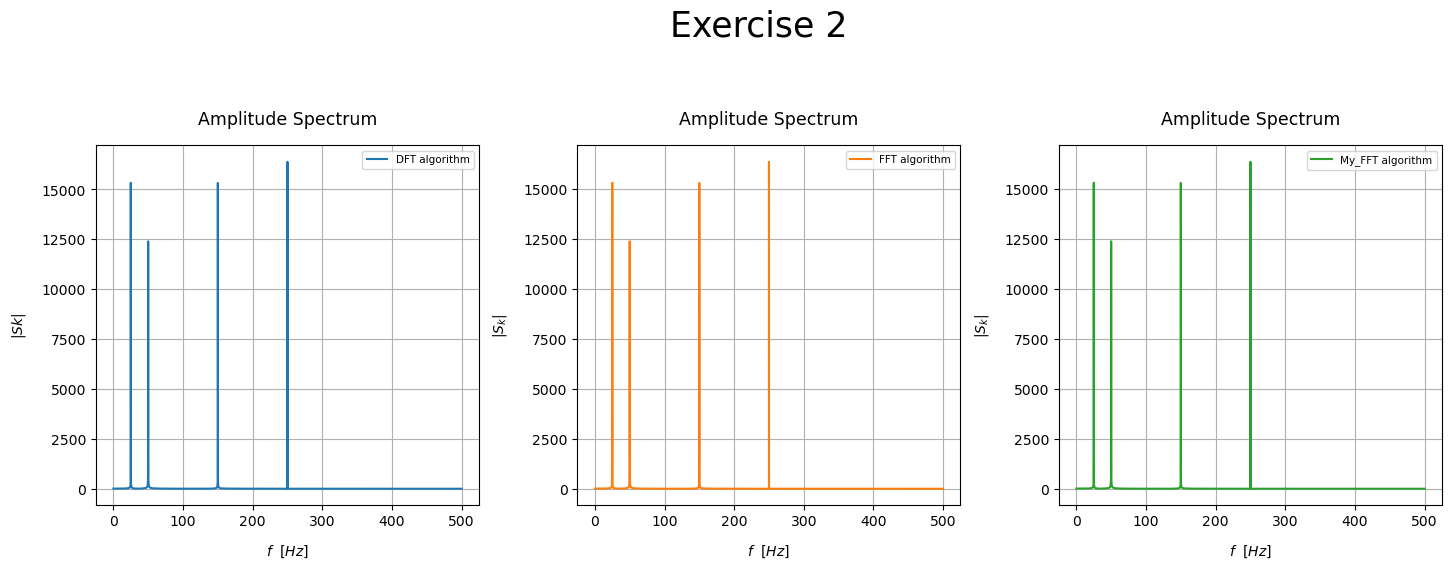

In [16]:
Sk_dft=[ Sk_dft[Int(Ns/2) + 2: Ns]; Sk_dft[1:Int(Ns/2)+1]];
fig, axs= plt.subplots(figsize=(15,5), nrows=1, ncols=3);
fig.tight_layout(pad=4.0)
fig.suptitle("Exercise 2", fontsize=font_title, y=1.15)
axs[1,1].plot(f[1:Ms+1],abs.((Sk_dft[1:Ms+1])),c=colors[1],label="DFT algorithm")   
#axs[1,1].plot(f[1:Ms+1],BPF_k[1:Ms+1],c=colors[6],label="Filter Frequency Response")
axs[1,1].set_title("Amplitude Spectrum",fontsize=font_title/2, pad=pad)
axs[1,1].set_xlabel(L"f~~[Hz]",fontsize=font_label/2, labelpad=labelpad)
axs[1,1].set_ylabel(L"|S{k}|",fontsize=font_label/2, labelpad=labelpad)
axs[1,1].legend(loc="upper right", fontsize=size_label/2)
axs[1,1].grid(true)
#Plot 2
axs[2,1].plot(f[1:Ms+1],abs.(Sk_fft[1:Ms+1]),c=colors[2],label="FFT algorithm")
axs[2,1].set_title("Amplitude Spectrum",fontsize=font_title/2, pad=pad)
axs[2,1].set_xlabel(L"f~~[Hz]",fontsize=font_label/2, labelpad=labelpad)
axs[2,1].set_ylabel(L"|S_{k}|",fontsize=font_label/2, labelpad=labelpad)
axs[2,1].legend(loc="upper right", fontsize=size_label/2)
axs[2,1].grid(true)
#Plot 3
axs[3,1].plot(f[1:Ms+1],abs.(Sk_myfft[1:Ms+1]),c=colors[3],label="My_FFT algorithm")
axs[3,1].set_title("Amplitude Spectrum",fontsize=font_title/2, pad=pad)
axs[3,1].set_xlabel(L"f~~[Hz]",fontsize=font_label/2, labelpad=labelpad)
axs[3,1].set_ylabel(L"|S_{k}|",fontsize=font_label/2, labelpad=labelpad)
axs[3,1].legend(loc="upper right", fontsize=size_label/2)
axs[3,1].grid(true)

In [17]:
@time begin
    println("Time for FFT algorithm:")
    S1=fft(s);
end

@time begin
    println("Time for DtFT algorithm:")
    S2=DtFT(length(s),1.0,s);
end

@time begin
    println("Time for My_FFT algorithm:")
    S3=myfft(s);
end

Time for FFT algorithm:
  0.019540 seconds (19.97 k allocations: 2.232 MiB, 92.72% compilation time)
Time for DtFT algorithm:
 29.063436 seconds (23 allocations: 1.501 MiB)
Time for My_FFT algorithm:
  0.025165 seconds (98.37 k allocations: 19.127 MiB)


32768-element Vector{ComplexF64}:
 9.533843774035414 + 0.0im
 9.533852504263576 - 0.008778705320276062im
 9.533878694957405 - 0.01755747933845721im
 9.533922346506447 - 0.02633639082211301im
 9.533983459727693 - 0.035115508274238746im
  9.53406203528558 - 0.043894900454414895im
 9.534158074361121 - 0.052674636140220825im
 9.534271578518378 - 0.061454783999777274im
 9.534402549161923 - 0.07023541270791495im
 9.534550988358037 - 0.07901659108108279im
 9.534716898279727 - 0.08779838785063815im
 9.534900281160235 - 0.09658087180298805im
 9.535101139863537 - 0.10536411171170028im
                   ⋮
 9.535101139867985 + 0.10536411171180074im
  9.53490028116462 + 0.09658087180306378im
  9.53471689828418 + 0.0877983878506691im
 9.534550988362431 + 0.07901659108113675im
  9.53440254916631 + 0.07023541270793099im
 9.534271578522763 + 0.06145478399976248im
  9.53415807436542 + 0.052674636140315714im
 9.534062035289907 + 0.043894900454476596im
    9.533983459732 + 0.0351155082742166im
 9.5339223

#### 3. Read the data that corresponds to a seismic section that consists of $nx= 225$ traces of $nt = 751$ samples each. Sampling interval is $t = 0.004$ seconds and distance between seismograms (also called CMP spacing) is $\Delta x = 25$m. The data is contaminated with random noise.

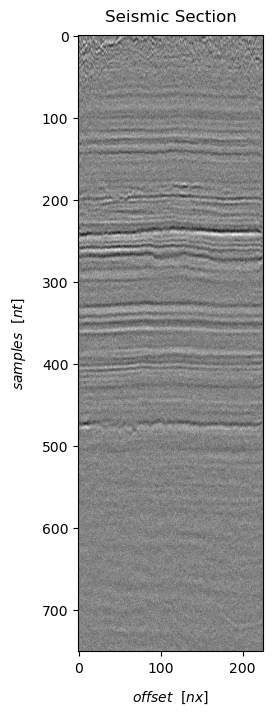

PyObject Text(0.5, 26.281250000000004, '$offset~~[nx]$')

In [18]:
## Load data ##
file_name="data.bin"
fopen= open(file_name,"r");
nx = 225; nt = 751;
dt= 0.004; # sampling rate.
N = nt*nx
data = zeros(Float64,N);
read!(fopen,data);
close(fopen)
data = reshape(data,nt,nx);

## Plot ##
plt.figure(2,figsize=(4,8));
plt.imshow(data,cmap="gist_gray")
plt.title("Seismic Section", pad= 10)
plt.ylabel(L"samples~~[nt]",fontsize=font_label/2, labelpad=labelpad)
plt.xlabel(L"offset~~[nx]",fontsize=font_label/2, labelpad=labelpad)

#### 3.a Compute the average amplitude spectrum of the data and plot it versus frequency in Hz. Plot only positive frequencies.

In [19]:
#Function to compute average spectum of seismic section....
function average_spectrum(data)
    
    nt=size(data,1);
    Md= Int((nt-1)/2);
    Dk=fft(data,1);
    Dk=sum(Dk,dims=2);
    Dk=Dk/size(Dk,2);
    #Dk=[Dk[Md+2:nt];Dk[1:Md+1]]
    return Dk
end


average_spectrum (generic function with 1 method)

In [24]:
#Average spectrum of data
Dk=average_spectrum(data);
Dk=vec(Dk);
complete_spectrum= copy(Dk)
# frequency vector of data
dω=2π/(nt-1);
ω =[-π + dω*(k-1) for k=1:nt];
ω= π .+ ω;
f= ω/(dt*2π);
Md=Int((nt-1)/2);

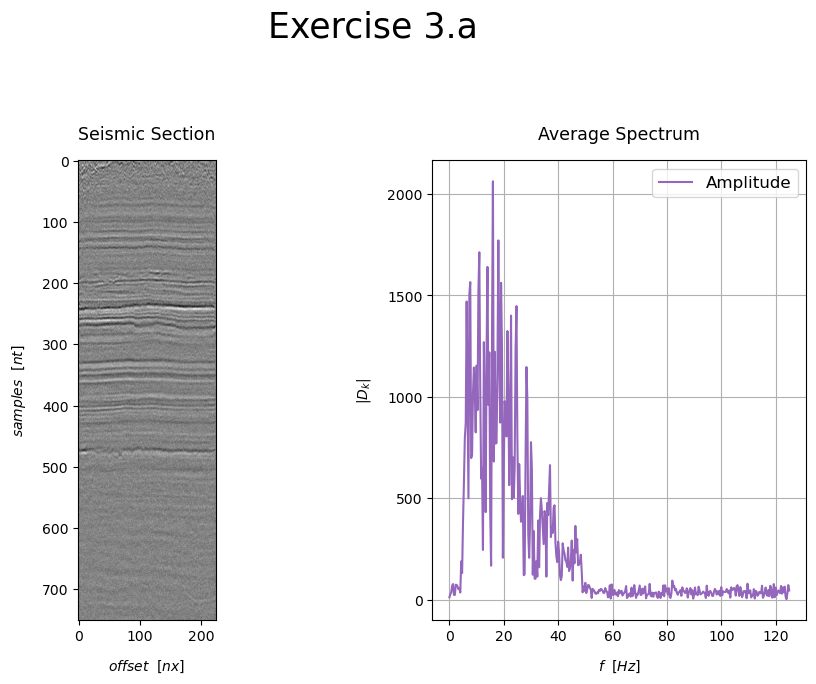

In [25]:
##

fig, axs= plt.subplots(figsize=(10,6), nrows=1, ncols=2);
fig.tight_layout(pad=4.0)
fig.suptitle("Exercise 3.a", fontsize=font_title, y=1.15)
axs[1,1].set_title("Seismic Section",fontsize=font_title/2, pad=pad)
axs[1,1].imshow(data,cmap="gist_gray",label="seismic section")
axs[1,1].set_xlabel(L"offset~~[nx]",fontsize=font_label/2, labelpad=labelpad)
axs[1,1].set_ylabel(L"samples~~[nt]",fontsize=font_label/2, labelpad=labelpad)
#axs[1,1].legend(loc="upper right", fontsize=size_label);
axs[2,1].set_title("Average Spectrum",fontsize=font_title/2, pad=pad)
axs[2,1].grid("True")
axs[2,1].plot(f[1:Md+1],(abs.(Dk[1:Md+1])),c=colors[5],label="Amplitude")
#axs[2,1].set_xticklabels(["0","25","50","75","100","125"])
axs[2,1].set_xlabel(L"f~~[Hz]",fontsize=font_label/2, labelpad=labelpad)
axs[2,1].set_ylabel(L"|D_{k}|",fontsize=font_label/2, labelpad=labelpad)
axs[2,1].legend(loc="upper right", fontsize=size_label*0.8);

#### 3.b Write a code to filter the individual traces using the fft. The code involves going to the frequency domain and multiply the DFT coefficients of the data with the frequency domain. Careful with symmetries, remember that you need to return to time and get back seismograms that are real signals at the end of the process. Play with different values of f1, f2, f3, f4 by looking at the input data's amplitude spectrum to define how to reject noise.

In [26]:
# Function to compute band pass filter
function BPF(N,f1,f2,f3,f4)
    
    #N=8
    Mb=Int((N-1)/2)
    BPF=zeros(Float64,N)
    
     
    n1 = round(Int, f1*dt*N +1) 
    n2 = round(Int, f2*dt*N +1)
    n3 = round(Int, f3*dt*N +1)
    n4 = round(Int, f4*dt*N +1)

    for i=n1:n2
        BPF[i] = (i-n1)/(n2-n1)
    end

    for i=n2+1:n3
        BPF[i] = 1.0
    end

    for i=n3+1:n4
        BPF[i] = -1*(i-n4)/(n4-n3)
    end

    # Hermiticidad 
    for k= Mb+2:N
        BPF[k]= conj(BPF[N-k+2])
    end
    
    # Hermiticidad:
   #B1=B[1:Mb+1] 
   # B2=reverse(B[2:Mb+1])
   # BPF=[B1;B2]

    #Move frequencies from π to almost 2π to negative frequencies
    
    #BPF=[BPF[Mb+2:nt] ; BPF[1:Mb+1]]
    
    return BPF
end

BPF (generic function with 1 method)

In [27]:
#Filtering using symmetries
#=
Dkf=zeros(ComplexF64,nt);

for i=1:Md+1
    Dkf[i]= Dk[i]*BPF_k[i]
end

for i=Md+2:nt
    Dkf[i]=conj(Dkf[nt-i+2])
end
=#
#applying band pass filter to data
BPF_k=BPF(nt,3,5,20,55);
Dkf= Dk.*BPF_k;



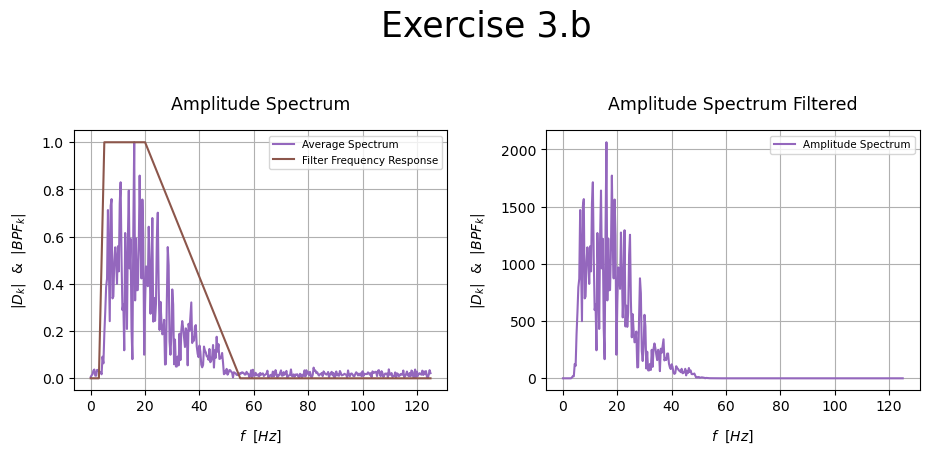

In [28]:

fig, axs= plt.subplots(figsize=(10,4), nrows=1, ncols=2);
fig.tight_layout(pad=4.0)
fig.suptitle("Exercise 3.b", fontsize=font_title, y=1.15)
amp=abs.(Dk[1:Md+1]);
amp=amp./maximum(amp);

## Plots ##

#Plot 1
axs[1,1].plot(f[1:Md+1],amp,c=colors[5],label="Average Spectrum")   
axs[1,1].plot(f[1:Md+1],BPF_k[1:Md+1],c=colors[6],label="Filter Frequency Response")
axs[1,1].set_title("Amplitude Spectrum",fontsize=font_title/2, pad=pad)
axs[1,1].set_xlabel(L"f~~[Hz]",fontsize=font_label/2, labelpad=labelpad)
axs[1,1].set_ylabel(L"|D_{k}|~~&~~|BPF_{k}| ",fontsize=font_label/2, labelpad=labelpad)
axs[1,1].legend(loc="upper right", fontsize=size_label/2)
axs[1,1].grid(true)
#Plot 2
axs[2,1].plot(f[1:Md+1],abs.(Dkf[1:Md+1]),c=colors[5],label="Amplitude Spectrum")
axs[2,1].set_title("Amplitude Spectrum Filtered",fontsize=font_title/2, pad=pad)
axs[2,1].set_xlabel(L"f~~[Hz]",fontsize=font_label/2, labelpad=labelpad)
axs[2,1].set_ylabel(L"|D_{k}|~~&~~|BPF_{k}| ",fontsize=font_label/2, labelpad=labelpad)
axs[2,1].legend(loc="upper right", fontsize=size_label/2)
axs[2,1].grid(true)

In [29]:
#Function to apply filter to data.

function apply_BPF(data,f1,f2,f3,f4)
    
    
    nt=size(data,1);
    nx=size(data,2);
    BPF_k=BPF(nt,f1,f2,f3,f4);
    data_filtered=zeros(nt,nx)
    f=[f1,f2,f3,f4]
    for i=1:nx
        Dk=fft(data[:,i]);
        Dkf=Dk.*BPF_k;
        dkf=real(ifft(Dkf))
        data_filtered[:,i] = dkf
    end
    
    return data_filtered, f
end


apply_BPF (generic function with 1 method)

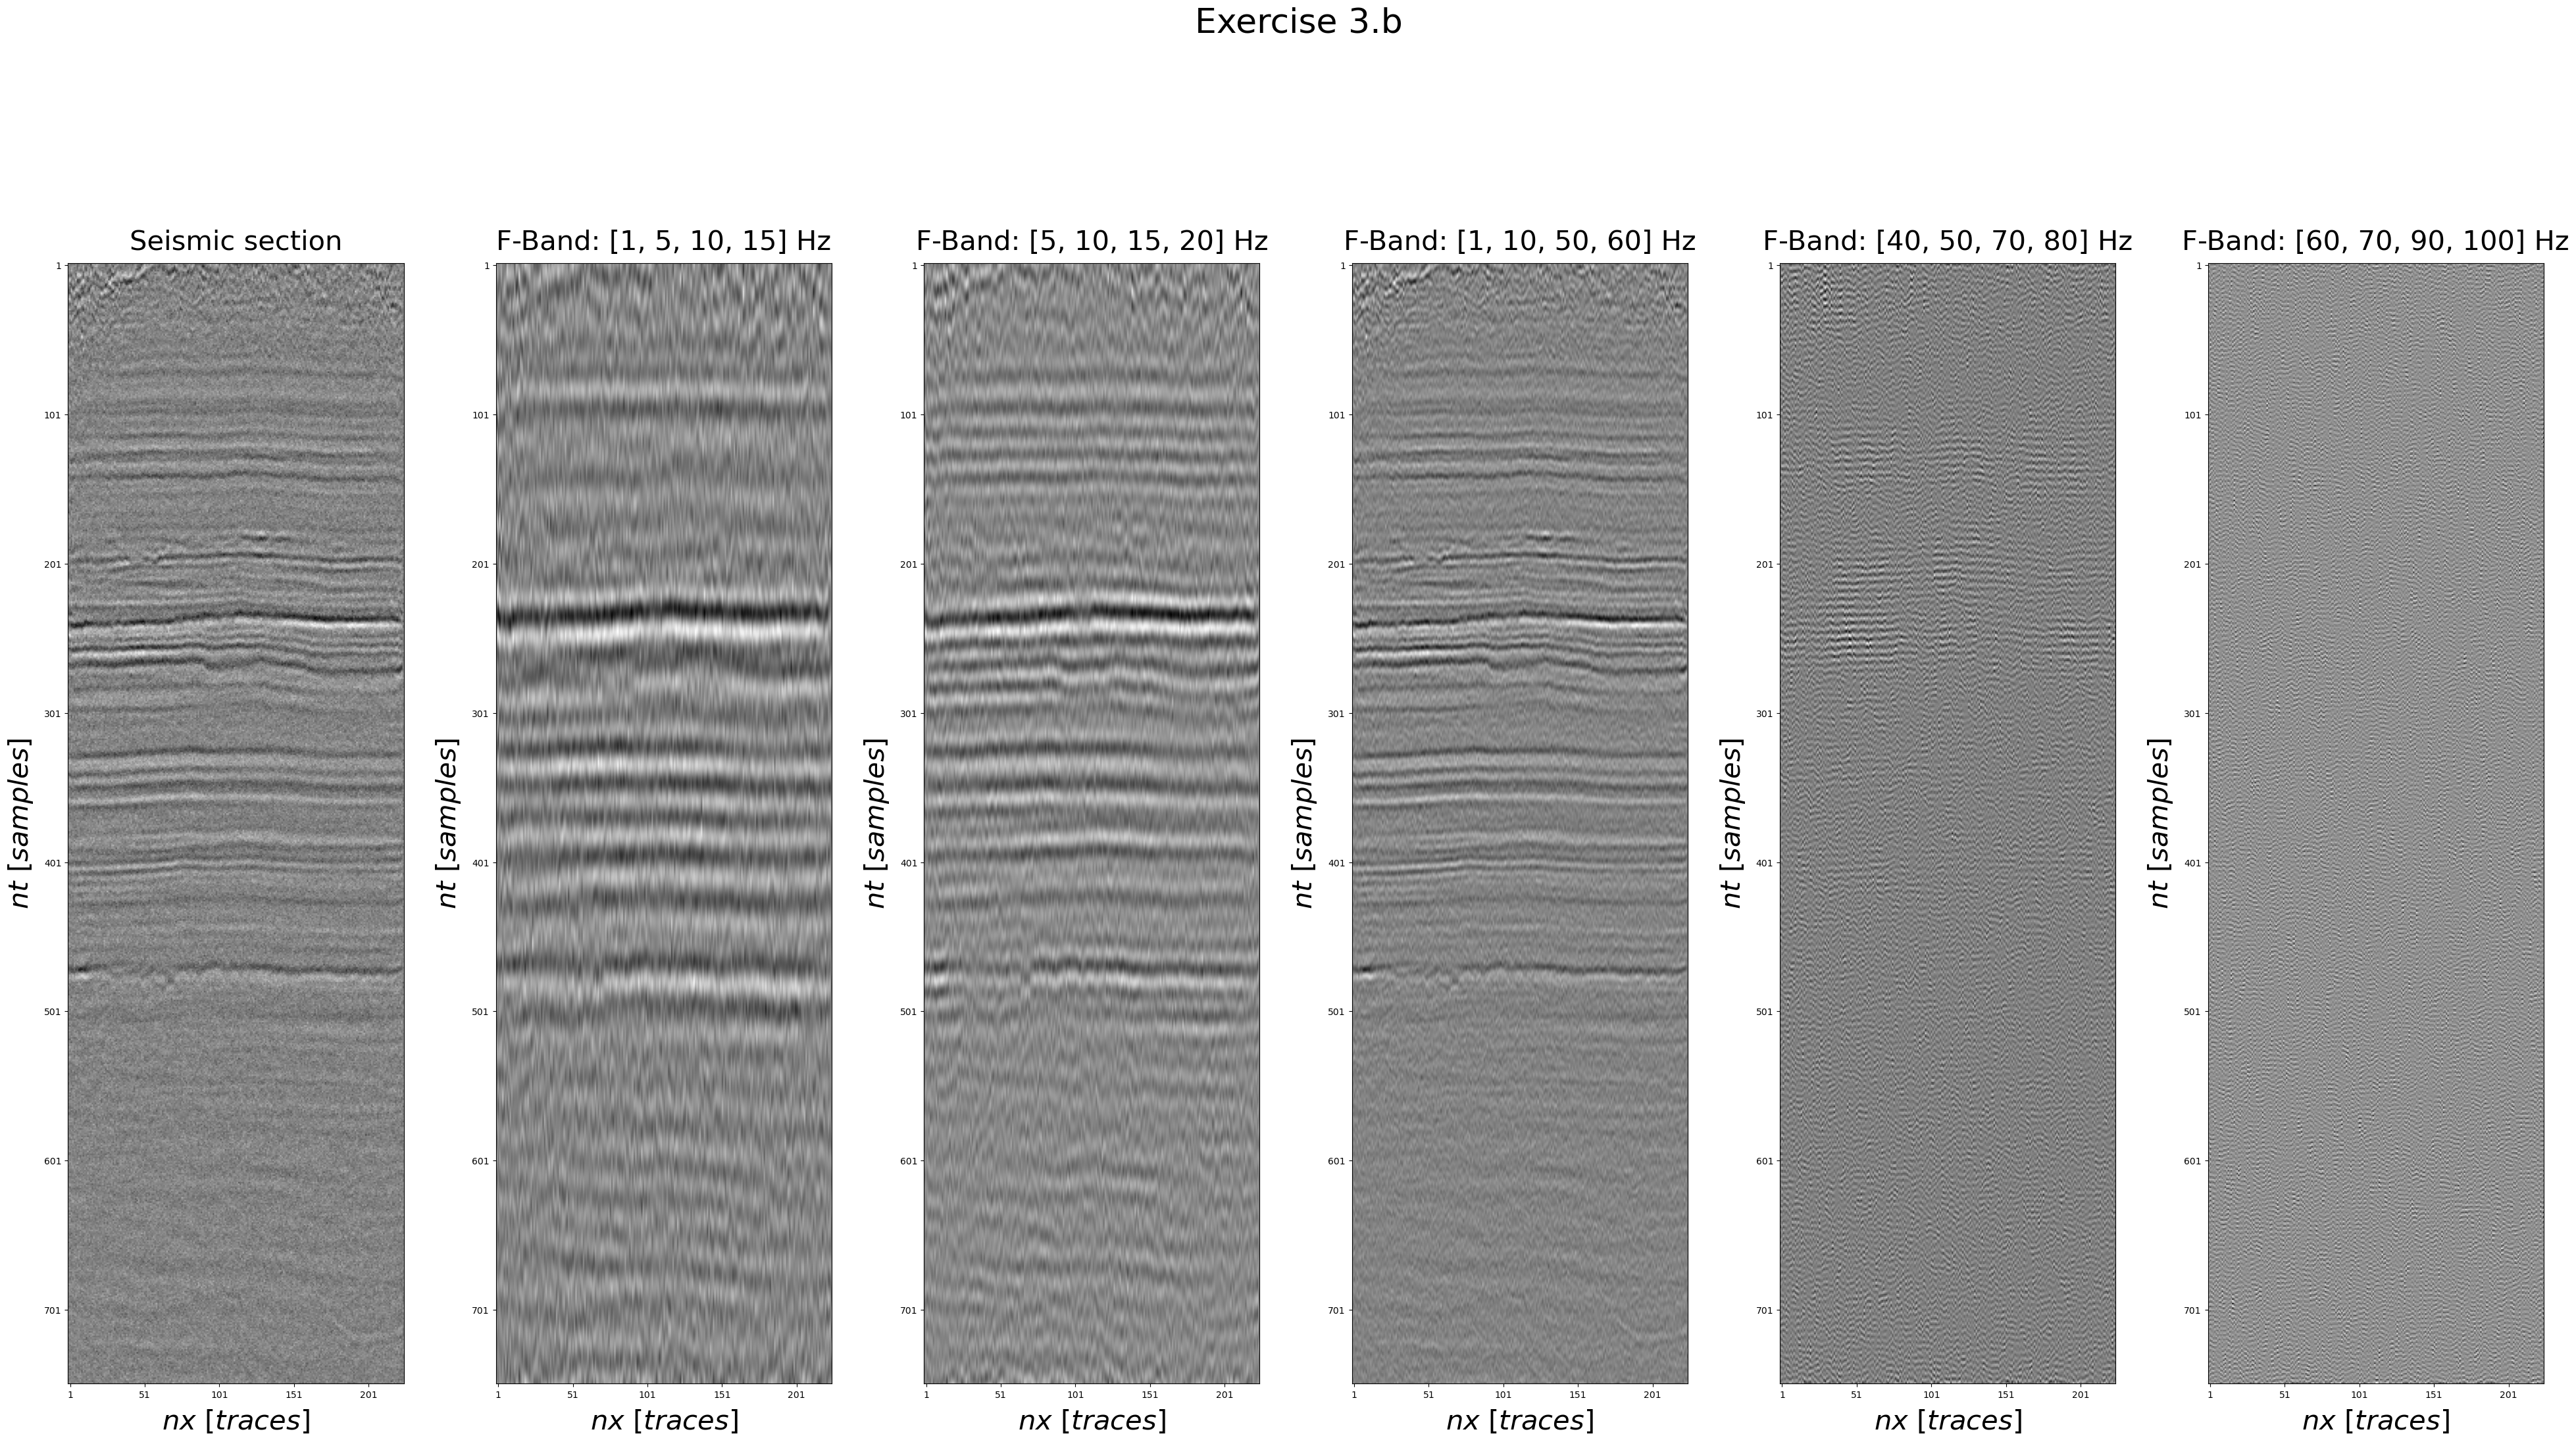

In [30]:
ful=[1 5 10 15];fl= [5 10 15 20]; fm=[1 10 50 60] ;fh=[40 50 70 80]; fuh=[60 70 90 100] # Frequencies
frequencies=[ful; fl; fm; fh; fuh] # matrix of frequencies
BP_results=zeros(Float64,(nt,nx,size(frequencies,1))) #array of different results for different frequencies

## Loop To Plot ##

fig, axs= plt.subplots(figsize=(40,25), nrows=1, ncols=6);
fig.tight_layout(pad=7.0)
fig.suptitle("Exercise 3.b", fontsize=font_title*1.5, y=1.0005)

axs[1].imshow(data,cmap="gist_gray",label="Frequency content:[eso es]")
axs[1].set_title("Seismic section",fontsize=font_title*1.2, pad=pad)
   # axs[1].imshow(BP_results[:,:,i],cmap="gist_gray",label="Frequency content:[eso es]")    
axs[1].set_xlabel(L"nx~[traces]",fontsize=font_label*1.5, labelpad=labelpad)
axs[1].set_ylabel(L"nt~[samples]",fontsize=font_label*1.5, labelpad=labelpad)
axs[1].set_xticks(collect(1:50:250))
axs[1].set_yticks(collect(1:100:750))

for i= 1:size(frequencies,1)
    BP_results[:,:,i], freq=apply_BPF(data,frequencies[i,1],frequencies[i,2],frequencies[i,3],frequencies[i,4])
    axs[i+1].set_title("F-Band: $freq Hz",fontsize=font_title*1.2, pad=pad)
    axs[i+1].imshow(BP_results[:,:,i],cmap="gist_gray")    
    axs[i+1].set_xlabel(L"nx~[traces]",fontsize=font_label*1.5, labelpad=labelpad)
    axs[i+1].set_ylabel(L"nt~[samples]",fontsize=font_label*1.5, labelpad=labelpad)
    axs[i+1].set_xticks(collect(1:50:250))
    axs[i+1].set_yticks(collect(1:100:750))
end



#### 3.C Compute the average amplitude spectrum of the filtered data and plot it versus frequency $f$ in Hz. Plot only positive frequencies. For QC, plot one single trace before and after filtering.

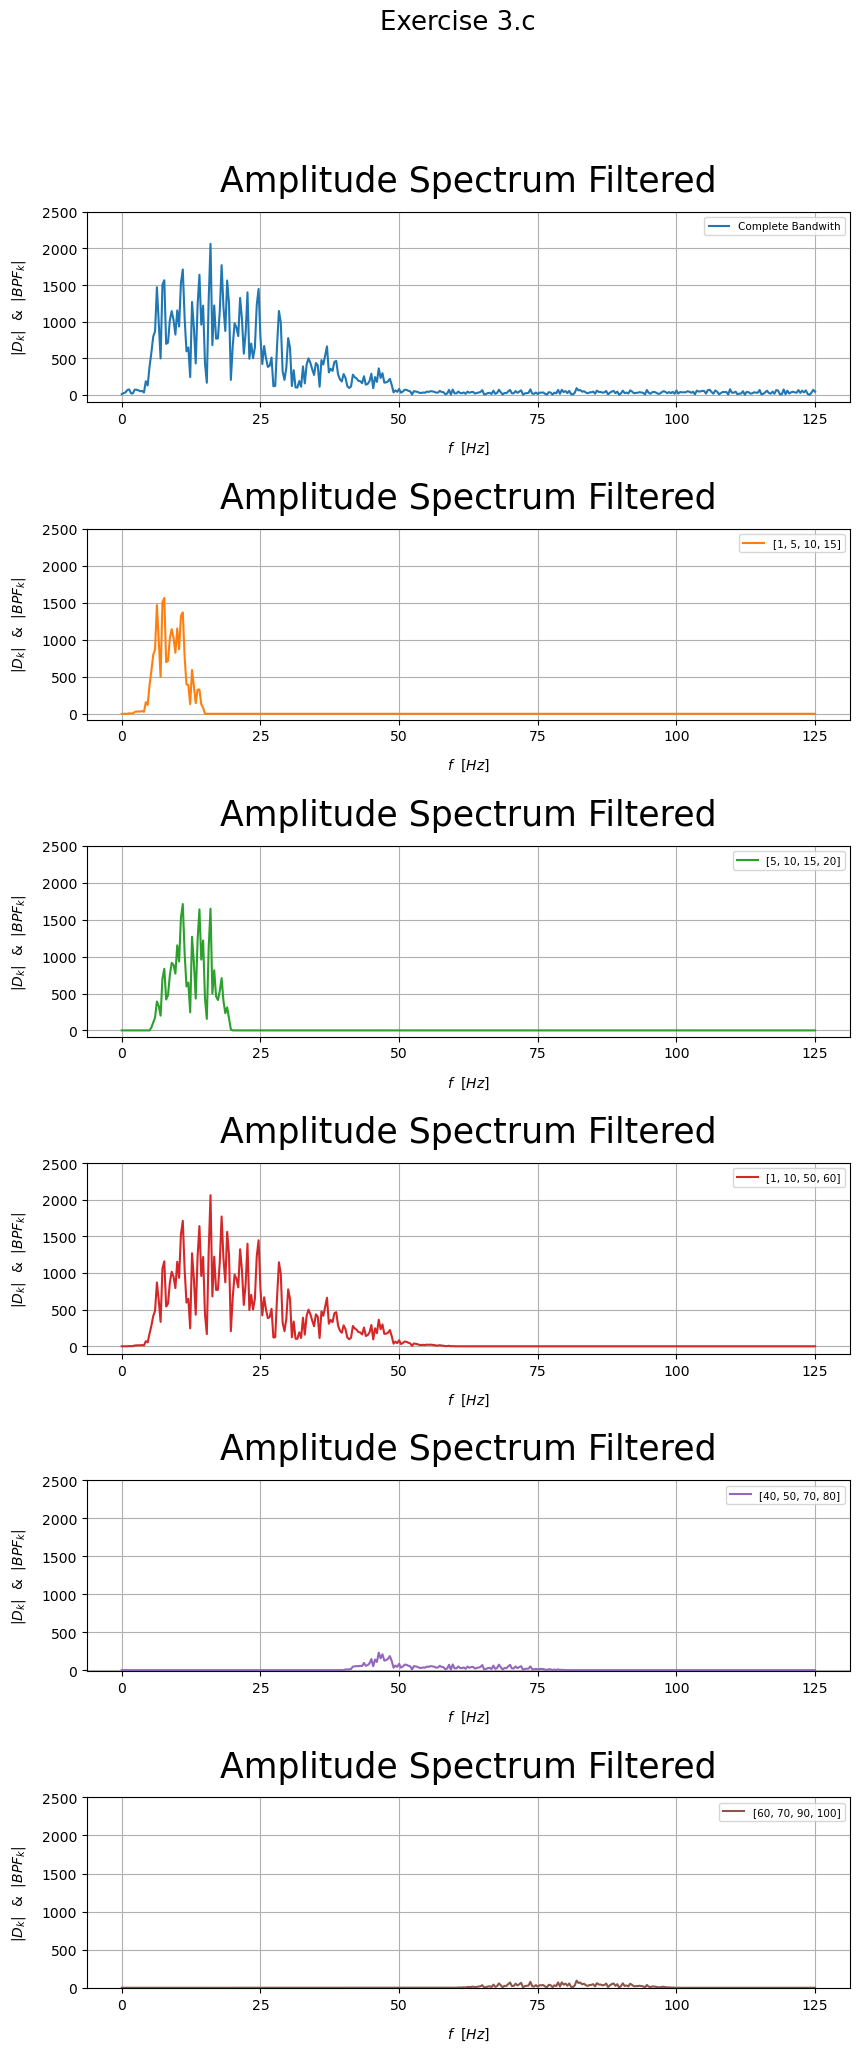

In [31]:
#Average spectrum of data

fig, axs= plt.subplots(figsize=(10,20), nrows=6, ncols=1);
fig.tight_layout(pad=7.0)
fig.suptitle("Exercise 3.c", fontsize=font_title*0.75, y=1.05)


    axs[1].plot(f[1:Md+1],abs.(complete_spectrum[1:Md+1]),c=colors[1],label="Complete Bandwith")
    axs[1].grid("True")
    axs[1].set_title("Amplitude Spectrum Filtered",fontsize=font_title, pad=pad)
    axs[1].set_xlabel(L"f~~[Hz]",fontsize=font_label/2, labelpad=labelpad)
    axs[1].set_ylabel(L"|D_{k}|~~&~~|BPF_{k}| ",fontsize=font_label/2, labelpad=labelpad)
    axs[1].legend(loc="upper right", fontsize=size_label/2)
    axs[1].set_xticks(collect(0:25:125))
    axs[1].set_yticks(collect(0:500:2500))

for i=1:size(frequencies,1)
    Dk=average_spectrum(BP_results[:,:,i]);
    Dkf=vec(Dk);
    
    axs[i+1].plot(f[1:Md+1],abs.(Dkf[1:Md+1]),c=colors[i+1],label= string(frequencies[i,:]) )
    axs[i+1].grid("True")
    axs[i+1].set_title("Amplitude Spectrum Filtered",fontsize=font_title, pad=pad)
    axs[i+1].set_xlabel(L"f~~[Hz]",fontsize=font_label/2, labelpad=labelpad)
    axs[i+1].set_ylabel(L"|D_{k}|~~&~~|BPF_{k}| ",fontsize=font_label/2, labelpad=labelpad)
    axs[i+1].legend(loc="upper right", fontsize=size_label/2)
    axs[i+1].set_xticks(collect(0:25:125))
    axs[i+1].set_yticks(collect(0:500:2500))
end



#### 4 Read the time series of sunspot numbers. The series corresponds to annual total number of sunspots from the year 1700 to 2020. This is an historical time series often used to analyze solar activity.

#### Use the FFT to estimate the Power Spectral Density (PSD) of the time series via the Periodogram. First remove the mean of the time series, then plot the Periodogram in decibels and compare your results to those in the paper by McDonald.  The sampling rate is defined as $\Delta t = 1$ year, hence Nyquist frequency is $f_{N} = 0.5 cycles/year$. 

#### The Periodogram is an estimator of PSD and it is defined as:
$$ P_{k}= |X_{k}|^{2}$$


**File Content**:


- Column 1: Gregorian calendar year (mid-year date).
- Column 2: Yearly mean total sunspot number.
- Column 3: Yearly mean standard deviation of the input sunspot numbers from individual stations.
- Column 4: Number of observations used to compute the yearly mean total sunspot number.

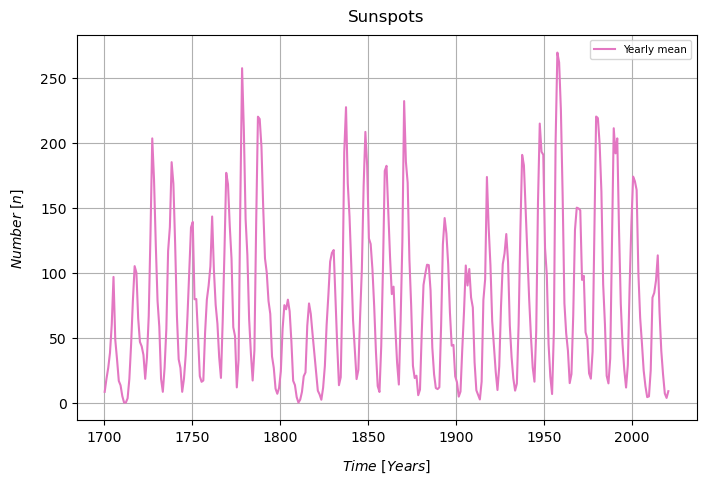

In [32]:
using Statistics

## Read data ##
data4=readdlm("SN_y_tot_V2.0.txt"); #annual total number of sunspots.
years=data4[:,1]; #years
sunspots=data4[:,2]; #yearly mean total sunspot number
yearly_std=data4[:,3]; #yearly mean std
n_obs=[:,4]; # number of observations used to compute the yearly mean

## Plot data ##
figure(1, figsize=(8,5))
plt.plot(years,sunspots, "-", c=colors[7],label="Yearly mean")
plt.grid(true)
plt.xlabel(L"Time~[Years]",labelpad=10.0)
plt.ylabel(L"Number~[n]",labelpad=10.0)
plt.title("Sunspots",pad="10")
plt.legend(loc="upper right", fontsize=size_label/2);

In [33]:
# Important frequencies...

N=length(sunspots);
dt= 1 #year;
fs= 1/dt # Sampling rate;
fn= fs/2 # cycle/year;

println("The Nyquist Frequency is: $fn [Cycles/year]")

The Nyquist Frequency is: 0.5 [Cycles/year]


Remove the mean of the signal, padd the signal and compute spectrum.

In [34]:
#compute the mean of the signal and substract#
sp_mean=mean(sunspots) 
sunspots=sunspots .- sp_mean;

# Padd the signal and compute DFT via fft...#
sunspots_padd=Padd1D(sunspots,10)

#Compute Spectrum and Power Spectrum.
Xk = fft(sunspots_padd); # DFT of sunspots signal
Xk_conj = conj(Xk); # Conjugate of the DFT of sunpots signal
Pk=Xk.*Xk_conj; # PSD ~= P= |A|^2
log_Pk=10*log10.(Pk); # dB PSD

In [35]:
#Frequency axis with padd
Np=length(Xk);
dω=2π/(Np);
ω=[ 0.0 + dω*k for k in 0:Np-1]
f= ω/(2π*dt);
Mp= Int(Np/2) #N/2


512

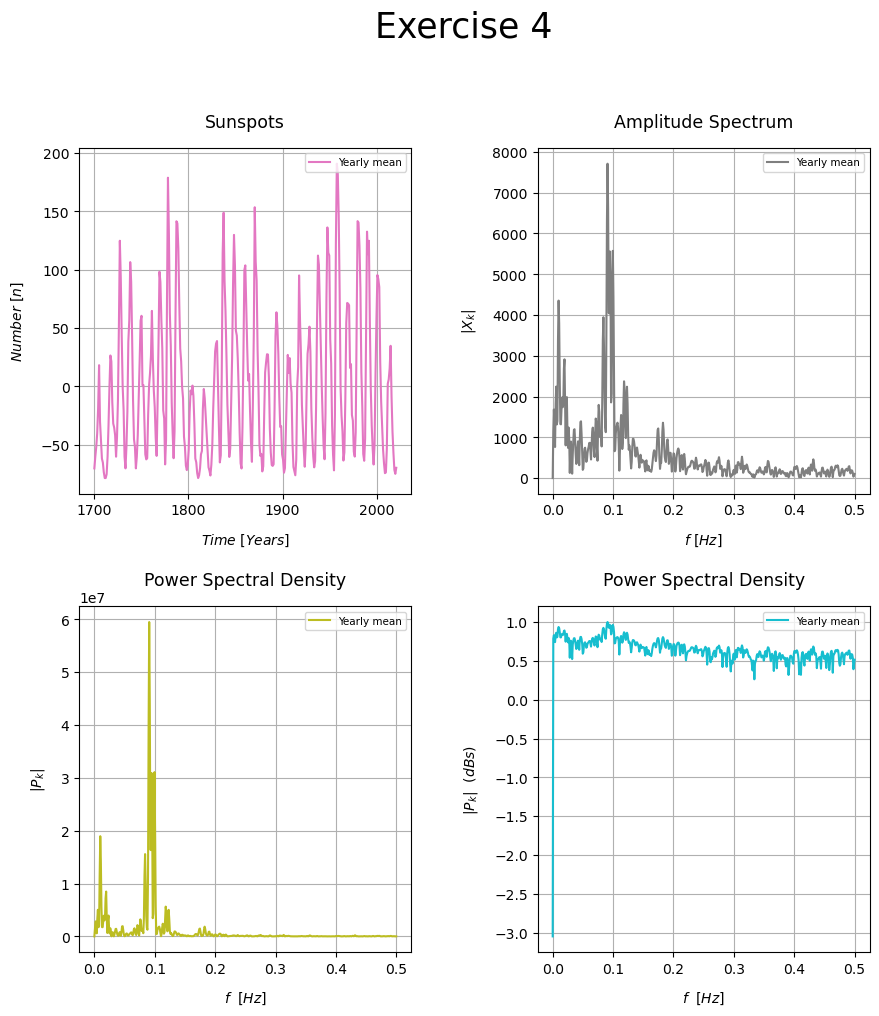

In [36]:

fig, axs= plt.subplots(figsize=(10,10), nrows=2, ncols=2);
fig.tight_layout(pad=6.0)
fig.suptitle("Exercise 4", fontsize=font_title, y=1.05)
#Plot 11
axs[1,1].set_title("Sunspots",fontsize=font_title/2, pad=pad)
axs[1,1].grid("True")
axs[1,1].plot(years,sunspots,c=colors[7],label="Yearly mean" )
axs[1,1].set_xlabel(L"Time~[Years]",fontsize=font_label/2, labelpad=labelpad)
axs[1,1].set_ylabel(L"Number~[n]",fontsize=font_label/2, labelpad=labelpad)
axs[1,1].legend(loc="upper right", fontsize=size_label/2);
#Plot 12
axs[1,2].set_title("Amplitude Spectrum",fontsize=font_title/2, pad=pad)
axs[1,2].grid("True")
axs[1,2].plot(f[1:Mp+1],abs.(Xk[1:Mp+1]),c=colors[8],label="Yearly mean")
axs[1,2].set_xlabel(L"f~[Hz]",fontsize=font_label/2, labelpad=labelpad)
axs[1,2].set_ylabel(L"|X_{k}|",fontsize=font_label/2, labelpad=labelpad)
axs[1,2].legend(loc="upper right", fontsize=size_label/2);
#Plot 21
axs[2,1].set_title("Power Spectral Density",fontsize=font_title/2, pad=pad)
axs[2,1].plot(f[1:Mp+1],real(Pk[1:Mp+1]), c=colors[9], label= "Yearly mean")
axs[2,1].set_xlabel(L"f~~[Hz]",fontsize=font_label/2, labelpad=labelpad)
axs[2,1].set_ylabel(L"|P_{k}|",fontsize=font_label/2, labelpad=labelpad)
axs[2,1].legend(loc="upper right", fontsize=size_label/2);
axs[2,1].grid("True")
#Plot 22
axs[2,2].set_title("Power Spectral Density",fontsize=font_title/2, pad=pad)
axs[2,2].plot(f[1:Mp+1],real(log_Pk[1:Mp+1]/maximum(real(log_Pk))), c=colors[10], label= "Yearly mean")
#axs[3,1].set_xticks(collect(0:fn/5:fn))
#axs[3,1].set_xticklabels(["0","25","50","75","100","125"])
axs[2,2].set_xlabel(L"f~~[Hz]",fontsize=font_label/2, labelpad=labelpad)
axs[2,2].set_ylabel(L"|P_{k}|~~(dBs)",fontsize=font_label/2, labelpad=labelpad)
axs[2,2].legend(loc="upper right", fontsize=size_label/2);
axs[2,2].grid("True");

### END